In [105]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [106]:



file_path = "Online_Transaction_Fraud_detection.csv"
df = pd.read_csv(file_path)


print(df.head())


   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   283   CASH_IN  210329.84  C1159819632     3778062.79      3988392.64   
1   132  CASH_OUT  215489.19  C1372369468       21518.00            0.00   
2   355     DEBIT    4431.05  C1059822709       20674.00        16242.95   
3   135  CASH_OUT  214026.20  C1464960643       46909.73            0.00   
4   381  CASH_OUT    8858.45   C831134427           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C1218876138      1519266.60      1308936.76        0               0  
1   C467105520      6345756.55      6794954.89        0               0  
2    C76588246        80876.56        85307.61        0               0  
3  C1059379810     13467450.36     13681476.56        0               0  
4   C579876929      1667180.58      1676039.03        0               0  


In [107]:
print(df.shape)


(636262, 11)


In [108]:
print( df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [109]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB
None


In [110]:
print(df.describe())


                step        amount  oldbalanceOrg  newbalanceOrig  \
count  636262.000000  6.362620e+05   6.362620e+05    6.362620e+05   
mean      242.931935  1.800585e+05   8.317937e+05    8.528354e+05   
std       142.330857  6.069714e+05   2.885636e+06    2.921296e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       155.000000  1.340742e+04   0.000000e+00    0.000000e+00   
50%       238.000000  7.481577e+04   1.423900e+04    0.000000e+00   
75%       334.000000  2.084988e+05   1.072998e+05    1.435652e+05   
max       742.000000  5.722962e+07   4.368662e+07    4.367380e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    6.362620e+05    6.362620e+05  636262.000000   636262.000000  
mean     1.096212e+06    1.221809e+06       0.001290        0.000003  
std      3.375389e+06    3.656213e+06       0.035898        0.001773  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00  

In [111]:
print(df.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   283   CASH_IN  210329.84  C1159819632     3778062.79      3988392.64   
1   132  CASH_OUT  215489.19  C1372369468       21518.00            0.00   
2   355     DEBIT    4431.05  C1059822709       20674.00        16242.95   
3   135  CASH_OUT  214026.20  C1464960643       46909.73            0.00   
4   381  CASH_OUT    8858.45   C831134427           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C1218876138      1519266.60      1308936.76        0               0  
1   C467105520      6345756.55      6794954.89        0               0  
2    C76588246        80876.56        85307.61        0               0  
3  C1059379810     13467450.36     13681476.56        0               0  
4   C579876929      1667180.58      1676039.03        0               0  


In [112]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [113]:
df.columns = df.columns.str.strip()  # Removes spaces before/after column names


In [114]:
x = df['step'].value_counts().nunique()
print("The number of different steps involved in transactions is:", x)


The number of different steps involved in transactions is: 371


In [115]:

print(df['isFraud'].value_counts(), "\n")

isFraud
0    635441
1       821
Name: count, dtype: int64 



In [116]:
# Check unique values in 'isFlaggedFraud'
print(df['isFlaggedFraud'].value_counts())


isFlaggedFraud
0    636260
1         2
Name: count, dtype: int64


In [117]:
# Drop the column if it has too few non-zero values
df = df.drop('isFlaggedFraud', axis=1)


In [118]:
print(df.type.value_counts())

type
CASH_OUT    224216
PAYMENT     214968
CASH_IN     139614
TRANSFER     53294
DEBIT         4170
Name: count, dtype: int64


<ipython-input-119-21e4e6f4ee27>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["green", "red"])


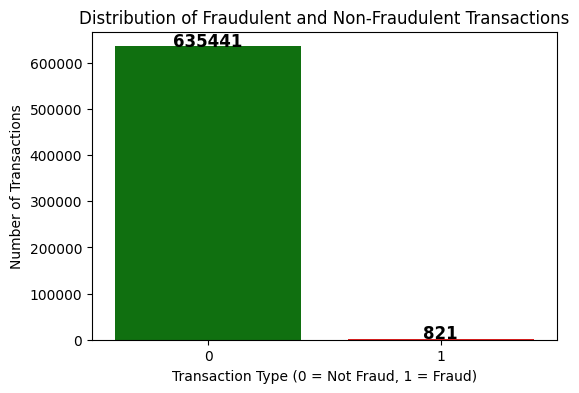

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of fraud and non-fraud transactions
fraud_counts = df['isFraud'].value_counts()

# Plot histogram
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["green", "red"])

# Add labels
plt.xlabel("Transaction Type (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")

# Display count values on top of bars
for i, count in enumerate(fraud_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


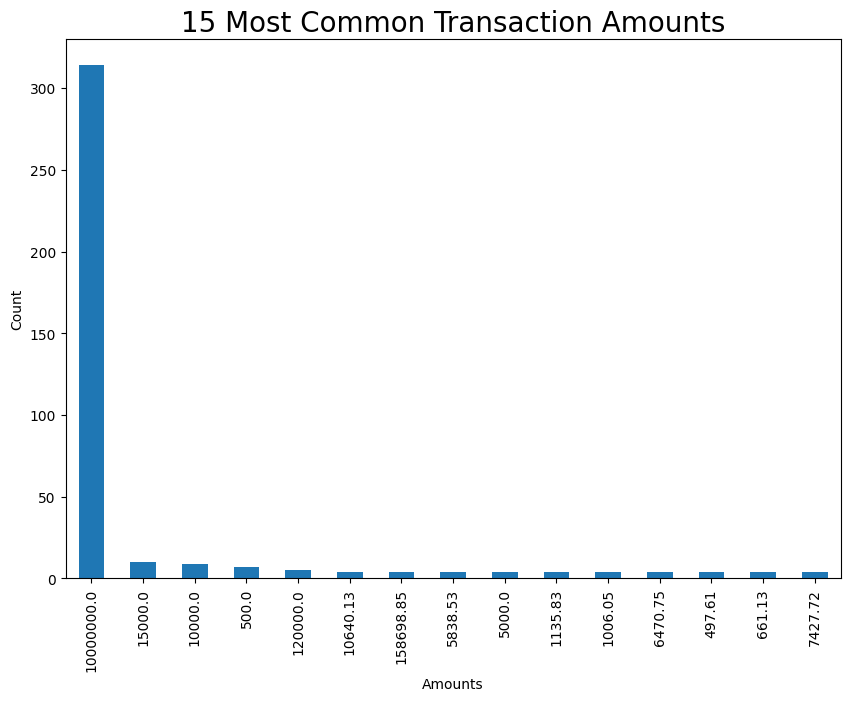

In [120]:
import matplotlib.ticker as mticker

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()

plt.title('15 Most Common Transaction Amounts', fontsize=20)
plt.xlabel('Amounts')
plt.ylabel('Count')

# Format y-axis labels to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


<ipython-input-121-5e39c48304ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")


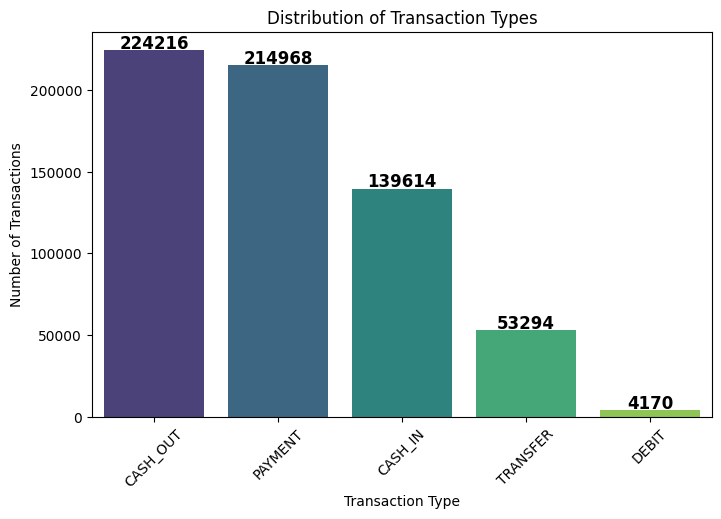

In [121]:
# Count the number of transactions for each type
transaction_counts = df['type'].value_counts()

# Plot histogram
plt.figure(figsize=(8,5))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")

# Add labels
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transaction Types")

# Display count values on top of bars
for i, count in enumerate(transaction_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


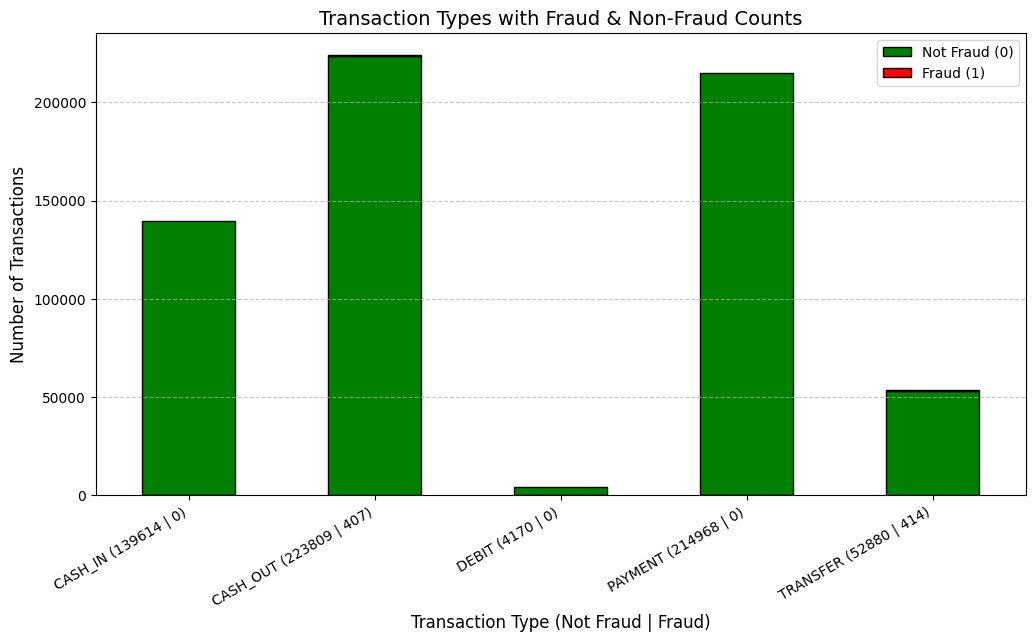

In [122]:
import matplotlib.pyplot as plt

# Count fraud and non-fraud transactions for each transaction type
transaction_fraud_counts = df.groupby("type")["isFraud"].value_counts().unstack().fillna(0)

# Define colors
colors = ["green", "red"]

# Create a new x-axis label with fraud & non-fraud counts
labels = [f"{t} ({int(nf)} | {int(f)})" for t, (nf, f) in zip(transaction_fraud_counts.index,
                                                               zip(transaction_fraud_counts[0], transaction_fraud_counts[1]))]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
transaction_fraud_counts.plot(kind="bar", stacked=True, color=colors, edgecolor="black", ax=ax)

# Set labels
ax.set_xlabel("Transaction Type (Not Fraud | Fraud)", fontsize=12)
ax.set_ylabel("Number of Transactions", fontsize=12)
ax.set_title("Transaction Types with Fraud & Non-Fraud Counts", fontsize=14)
ax.legend(["Not Fraud (0)", "Fraud (1)"])

# Replace x-axis labels with new formatted labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=10)  # Rotate for better readability

ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


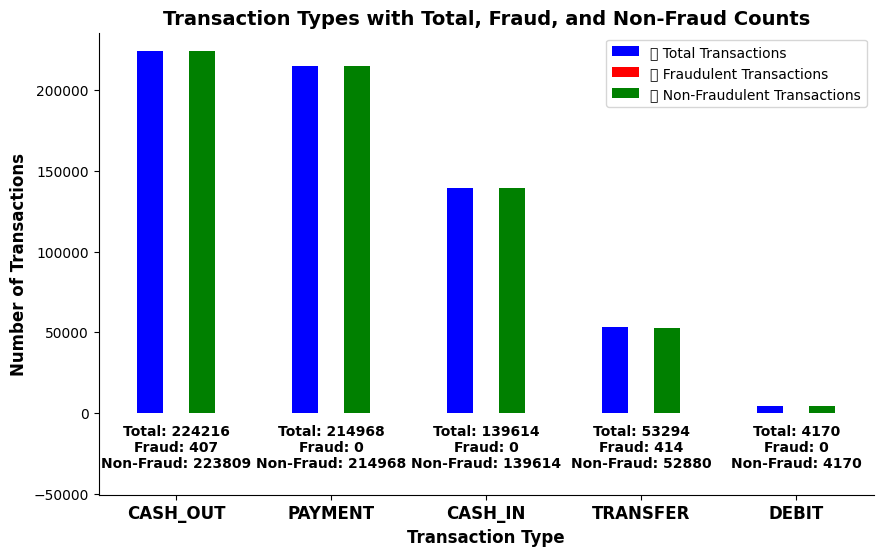

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count total transactions, fraud, and non-fraud for each transaction type
total_counts = df['type'].value_counts()
fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()
non_fraud_counts = df[df['isFraud'] == 0]['type'].value_counts()

# Ensure all transaction types are included, even if fraud or non-fraud is missing
transaction_summary = pd.DataFrame({
    "Total Transactions": total_counts,
    "Fraudulent Transactions": fraud_counts.reindex(total_counts.index, fill_value=0),
    "Non-Fraudulent Transactions": non_fraud_counts.reindex(total_counts.index, fill_value=0)
})

# Define colors for each category
colors = ["blue", "red", "green"]

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
transaction_summary.plot(kind="bar", color=colors, ax=ax)

# Ensure axes are visible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and title
plt.xlabel("Transaction Type", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')
plt.title("Transaction Types with Total, Fraud, and Non-Fraud Counts", fontsize=14, fontweight='bold')

# Custom legend inside the graph
plt.legend([
    "🔵 Total Transactions",
    "🔴 Fraudulent Transactions",
    "🟢 Non-Fraudulent Transactions"
], loc="upper right")

# Add count labels below each transaction type (spaced properly)
x_labels = transaction_summary.index.tolist()
count_labels = [
    f"Total: {int(total)}\nFraud: {int(fraud)}\nNon-Fraud: {int(non_fraud)}"
    for total, fraud, non_fraud in zip(transaction_summary["Total Transactions"],
                                       transaction_summary["Fraudulent Transactions"],
                                       transaction_summary["Non-Fraudulent Transactions"])
]

# Adjust x-axis labels for better spacing
plt.xticks(range(len(x_labels)), x_labels, rotation=0, fontsize=12, fontweight='bold')

# Add count labels below the bars with extra spacing
offset = max(total_counts) * 0.15  # Adjust this to move text further down
for i, count_text in enumerate(count_labels):
    plt.text(i, -offset, count_text, ha='center', fontsize=10, fontweight='bold', color='black')

# Extend y-axis limits to create more space at the bottom
plt.ylim(bottom=-offset * 1.5)

plt.show()


In [124]:
print('The Types of fraudulent transactions are {}'.format(list(df.loc[df['isFraud'] == 1, 'type'].drop_duplicates().values)) )


The Types of fraudulent transactions are ['CASH_OUT', 'TRANSFER']


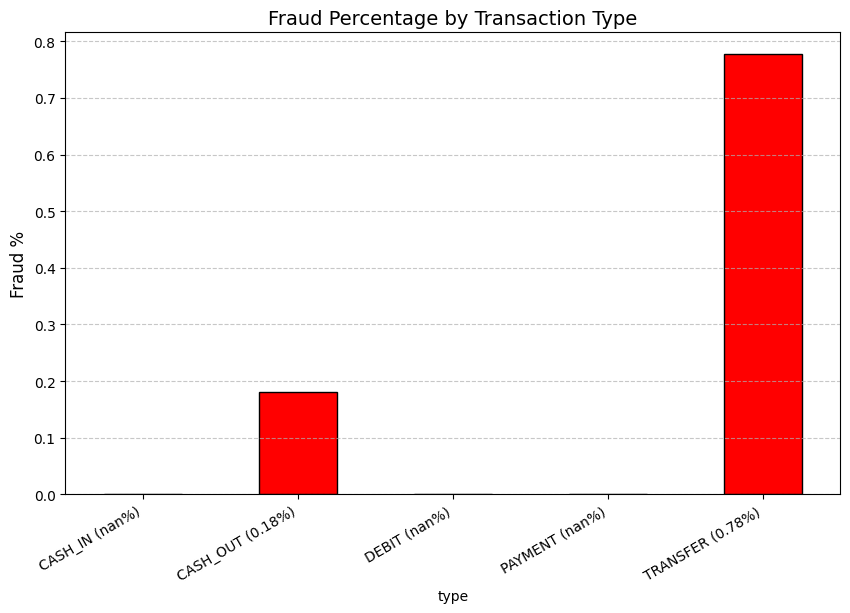

In [125]:
import matplotlib.pyplot as plt

# Calculate fraud percentage for each transaction type
fraud_percentage = df[df["isFraud"] == 1]["type"].value_counts() / df["type"].value_counts() * 100

# Convert values to strings with percentages
labels = [f"{t} ({p:.2f}%)" for t, p in zip(fraud_percentage.index, fraud_percentage.values)]

# Plot the fraud percentage by transaction type
plt.figure(figsize=(10, 6))
fraud_percentage.plot(kind='bar', color='red', edgecolor="black")

# Add labels
plt.title("Fraud Percentage by Transaction Type", fontsize=14)
plt.ylabel("Fraud %", fontsize=12)
plt.xticks(range(len(labels)), labels, rotation=30, ha="right", fontsize=10)  # Format x-axis labels with percentages

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()


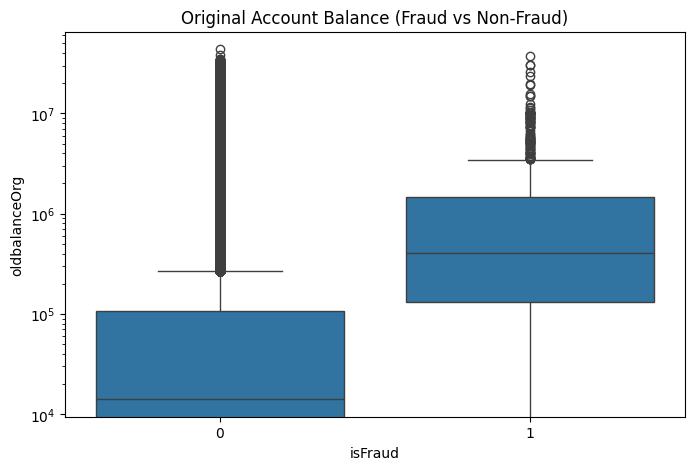

In [126]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="oldbalanceOrg", data=df)
plt.yscale('log')  # If needed for better visualization
plt.title("Original Account Balance (Fraud vs Non-Fraud)")
plt.show()


In [127]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)


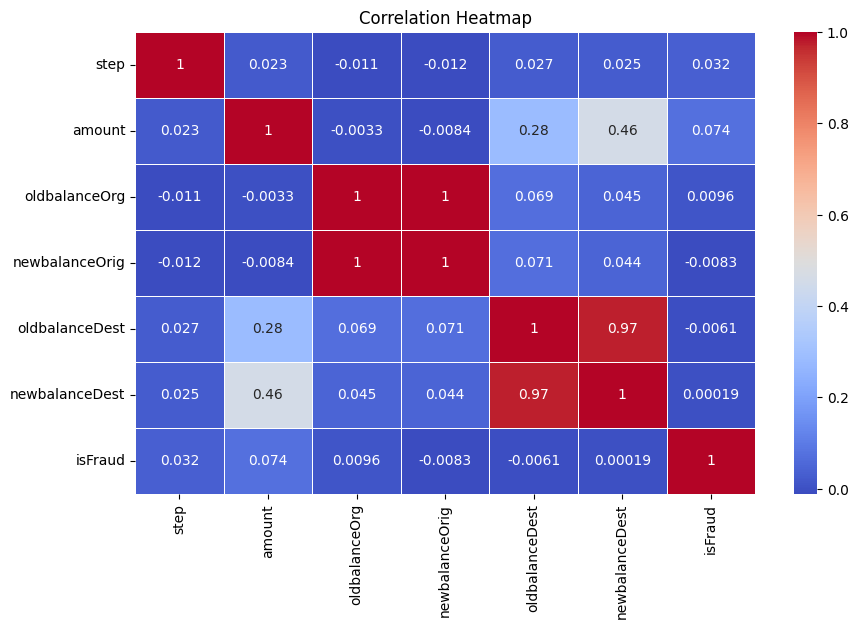

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numerical values (if needed)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [129]:
df.drop('step', axis=1, inplace=True)


In [130]:
# Drop destination balance columns due to low correlation with fraud
df.drop(['oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)


In [131]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'], dtype='object')

In [132]:
# Filter fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]

# Separate fraud transactions into TRANSFER and CASH_OUT
fraud_transfer = fraud_transactions[fraud_transactions['type'] == 'TRANSFER']
fraud_cash_out = fraud_transactions[fraud_transactions['type'] == 'CASH_OUT']

# Display results
print(f"Total Fraudulent TRANSFER Transactions: {len(fraud_transfer)}")
print(f"Total Fraudulent CASH_OUT Transactions: {len(fraud_cash_out)}")


Total Fraudulent TRANSFER Transactions: 414
Total Fraudulent CASH_OUT Transactions: 407


In [133]:
# Step 1: Keep only 'TRANSFER' and 'CASH_OUT' transactions
df_filtered = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

# Step 2: Encode 'type': TRANSFER → 0, CASH_OUT → 1
df_filtered['type'] = df_filtered['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

# Step 3: Confirm encodings
print("✅ Unique values in 'type':", df_filtered['type'].unique())
print("✅ Unique values in 'isFraud':", df_filtered['isFraud'].unique())


✅ Unique values in 'type': [1 0]
✅ Unique values in 'isFraud': [0 1]


In [134]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'], dtype='object')

In [135]:
# Step 2: Use only these columns
df_model = df_filtered[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]

# Step 3: Features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Step 4: Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [136]:
# Step 6: Scale only amount-related columns
scaler = StandardScaler()
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # Evaluation
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("🧾 Classification Report:\n", classification_report(y_test, y_pred))



🔍 Model: Logistic Regression
✅ Accuracy: 0.9424885589708479
📊 Confusion Matrix:
 [[52173  3165]
 [   27   137]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     55338
           1       0.04      0.84      0.08       164

    accuracy                           0.94     55502
   macro avg       0.52      0.89      0.52     55502
weighted avg       1.00      0.94      0.97     55502


🔍 Model: Decision Tree
✅ Accuracy: 0.998306367338114
📊 Confusion Matrix:
 [[55261    77]
 [   17   147]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55338
           1       0.66      0.90      0.76       164

    accuracy                           1.00     55502
   macro avg       0.83      0.95      0.88     55502
weighted avg       1.00      1.00      1.00     55502


🔍 Model: Random Forest
✅ Accuracy: 0.9981261936506792
📊 Confusion Matrix:


In [104]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [137]:
# Step 2: Use only these columns
df_model = df_filtered[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]

# Step 3: Features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Step 4: Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [138]:
# Step 6: Scale only amount-related columns
scaler = StandardScaler()
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])


In [139]:
# Step 7: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Step 8: Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9981261936506792
📊 Confusion Matrix:
 [[55251    87]
 [   17   147]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55338
           1       0.63      0.90      0.74       164

    accuracy                           1.00     55502
   macro avg       0.81      0.95      0.87     55502
weighted avg       1.00      1.00      1.00     55502



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


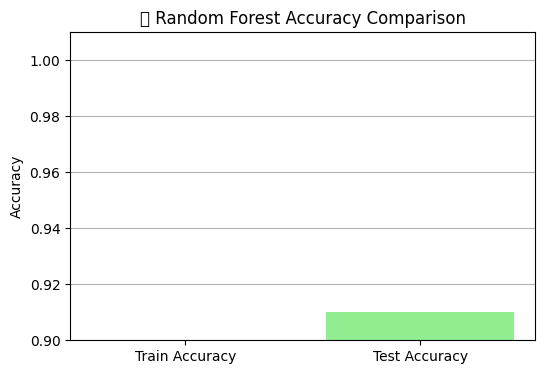

In [140]:
import matplotlib.pyplot as plt

# Get predictions on train and test sets
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Plot
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'lightgreen'])
plt.ylim(0.9, 1.01)
plt.title('📈 Random Forest Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


In [141]:
def predict_transaction_rf():
    print("🔍 Enter the transaction details below:\n")
    type_input = int(input("Enter type (TRANSFER=0, CASH_OUT=1): "))
    amount = float(input("Enter transaction amount: "))
    old_bal = float(input("Enter old balance of origin account: "))
    new_bal = float(input("Enter new balance of origin account: "))

    # Prepare DataFrame
    input_df = pd.DataFrame([{
        'type': type_input,
        'amount': amount,
        'oldbalanceOrg': old_bal,
        'newbalanceOrig': new_bal
    }])

    # Scale numeric columns only
    input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])

    # Predict
    prediction = rf_model.predict(input_df)[0]
    print("\n🎯 Prediction:", "Fraudulent Transaction ❌" if prediction == 1 else "Legit Transaction ✅")


In [148]:
predict_transaction_rf()


🔍 Enter the transaction details below:

Enter type (TRANSFER=0, CASH_OUT=1): 1
Enter transaction amount: 5000
Enter old balance of origin account: 5000
Enter new balance of origin account: 0

🎯 Prediction: Fraudulent Transaction ❌


In [ ]:
best_model = models["Decision Tree"]  # for example


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=features)
plt.title("🔍 Feature Importance")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features (you can adjust this as needed)
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
y = df['isFraud']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca_95 = pca.fit_transform(X_scaled)

# Optional: Check how many components were selected
print(f"Number of PCA components selected: {X_pca_95.shape[1]}")


Number of PCA components selected: 3


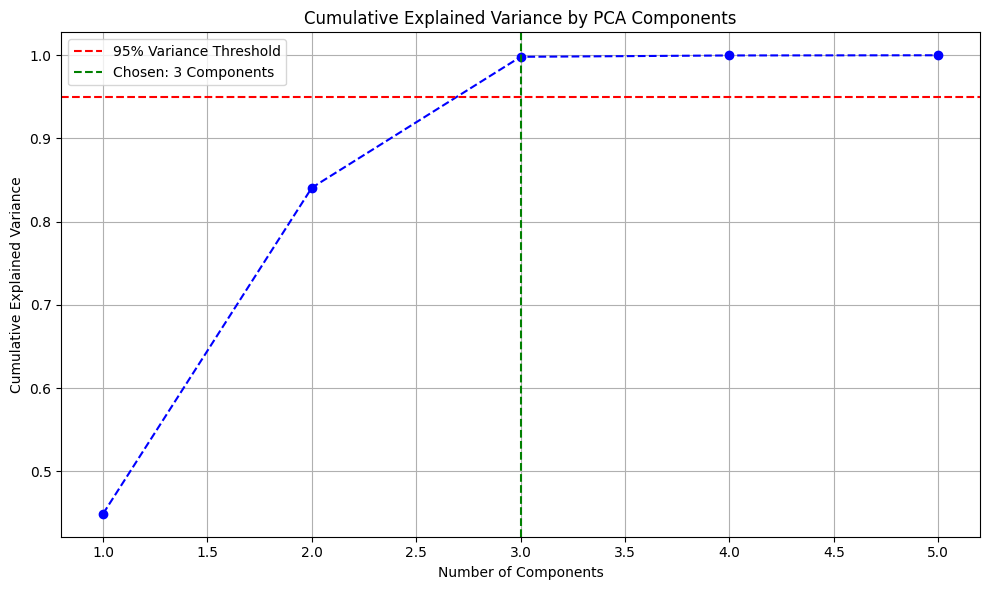

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA without limiting components first
pca_full = PCA()
pca_full.fit(X_scaled)

# Get explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Annotate where 3 components lie
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=3, color='g', linestyle='--', label='Chosen: 3 Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the PCA-reduced features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca_95, y)

# Optional: Check new class distribution
from collections import Counter
print("Resampled class distribution:", Counter(y_resampled))


Resampled class distribution: Counter({0: 635441, 1: 635441})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[188852   1781]
 [   322 190310]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    190633
           1       0.99      1.00      0.99    190632

    accuracy                           0.99    381265
   macro avg       0.99      0.99      0.99    381265
weighted avg       0.99      0.99      0.99    381265



In [ ]:
import numpy as np

# --- 1. Example input prompt for user ---
print("Enter the values for the 3 PCA components (PC1, PC2, PC3):")
pc1 = float(input("PC1: "))
pc2 = float(input("PC2: "))
pc3 = float(input("PC3: "))

# --- 2. Convert input into array ---
user_input = np.array([[pc1, pc2, pc3]])

# --- 3. Predict fraud or not ---
prediction = rf_model.predict(user_input)
prediction_proba = rf_model.predict_proba(user_input)

# --- 4. Show output ---
print("\n🔍 Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")
print("📊 Confidence (Fraud Probability): {:.2f}%".format(prediction_proba[0][1] * 100))


Enter the values for the 3 PCA components (PC1, PC2, PC3):
PC1: PC1


ValueError: could not convert string to float: 'PC1'

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca_95, y)

# Step 2: Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_pca_95' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is already loaded
# Drop non-relevant columns
df = df.drop(columns=['nameOrig', 'nameDest'])  # Drop columns with IDs

# Encode the 'type' column (CASH_IN, CASH_OUT, etc.) into numeric values
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Check the dataset after encoding
print(df.head())


   step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   283     0  210329.84     3778062.79      3988392.64      1519266.60   
1   132     1  215489.19       21518.00            0.00      6345756.55   
2   355     2    4431.05       20674.00        16242.95        80876.56   
3   135     1  214026.20       46909.73            0.00     13467450.36   
4   381     1    8858.45           0.00            0.00      1667180.58   

   newbalanceDest  isFraud  isFlaggedFraud  
0      1308936.76        0               0  
1      6794954.89        0               0  
2        85307.61        0               0  
3     13681476.56        0               0  
4      1676039.03        0               0  


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['isFraud'])  # All columns except target
y = df['isFraud']  # Target column

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (509009, 8), Testing set shape: (127253, 8)


In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,283,0,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0
1,132,1,215489.19,21518.00,0.00,6345756.55,6794954.89,0
2,355,2,4431.05,20674.00,16242.95,80876.56,85307.61,0
3,135,1,214026.20,46909.73,0.00,13467450.36,13681476.56,0
4,381,1,8858.45,0.00,0.00,1667180.58,1676039.03,0


In [ ]:
y.value_counts()

,count
isFraud,
0,635441
1,821


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probabilities for ROC AUC score (this is required for ROC AUC)
    y_train_proba = model.predict_proba(X_train)[:, 1]  # Probability of the positive class
    y_test_proba = model.predict_proba(X_test)[:, 1]    # Probability of the positive class

    # Training set performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba)

    # Test set performance
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    # Print results in requested format
    print(f"{name}")
    print("Model performance for Training set")
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- F1 score: {train_f1:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- Roc Auc Score: {train_roc_auc:.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- F1 score: {test_f1:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- Roc Auc Score: {test_roc_auc:.4f}")

    print("=" * 35)
    print("\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.9984
- F1 score: 0.4140
- Precision: 0.3972
- Recall: 0.4323
- Roc Auc Score: 0.8516
----------------------------------
Model performance for Test set
- Accuracy: 0.9984
- F1 score: 0.4516
- Precision: 0.4038
- Recall: 0.5122
- Roc Auc Score: 0.8936


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- F1 score: 0.8278
- Precision: 0.8204
- Recall: 0.8354
- Roc Auc Score: 0.9176


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9997
- F1 score: 0.8805
- Precision: 1.0000
- Recall: 0.7866
- Roc Auc Score: 0.9781


Gradient Boost
Model performance for Training set

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:28:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9798
- Precision: 1.0000
- Recall: 0.9604
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9997
- F1 score: 0.8758
- Precision: 0.9437
- Recall: 0.8171
- Roc Auc Score: 0.9997




In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Define the features to exclude from user input
exclude_features = ['step', 'isFlaggedFraud']

# Select only relevant features
features = [col for col in X_train.columns if col not in exclude_features]

# Train StandardScaler once and use it everywhere
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predictions on test set
y_test_pred = xgb.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:59:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.9997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       0.94      0.79      0.86       164

    accuracy                           1.00    127253
   macro avg       0.97      0.89      0.93    127253
weighted avg       1.00      1.00      1.00    127253



In [ ]:
def predict_fraud():
    print("\nEnter transaction details:")

    input_data = []
    for feature in features:
        value = float(input(f"{feature}: "))
        input_data.append(value)

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data], columns=features)

    # Use the **SAME SCALER** fitted on training data
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = xgb.predict(input_scaled)[0]

    # Output result
    print("\nPrediction:", "🚨 FRAUD DETECTED! 🚨" if prediction == 1 else "✅ Transaction is SAFE ✅")

# Call function to take input and predict fraud
predict_fraud()


Enter transaction details:
type: 2
amount: 500000
oldbalanceOrg: 500000
newbalanceOrig: 0
oldbalanceDest: 10000
newbalanceDest: 510000

Prediction: ✅ Transaction is SAFE ✅
